# **Stacked Charts**


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


##  Downloading and Loading the Data


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-13 10:48:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.0MB/s    in 2.8s    

2025-06-13 10:48:23 (55.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



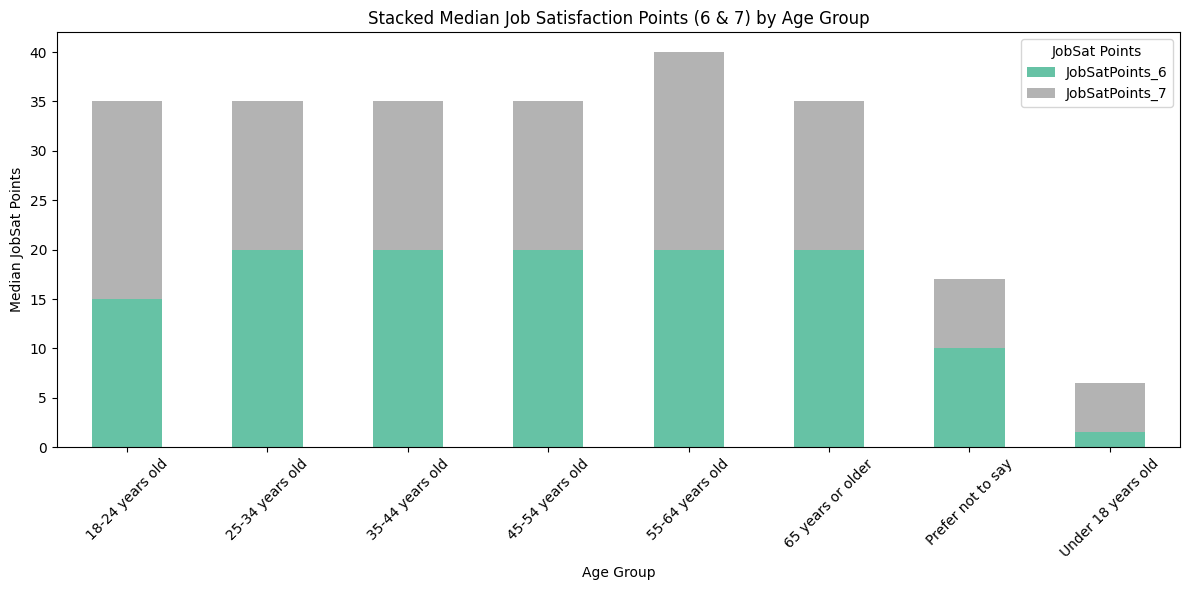

In [7]:
# Group by Age and calculate the median for JobSatPoints_6 and JobSatPoints_7
median_points = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort by age (optional, if Age is a categorical string)
median_points = median_points.loc[median_points.index.sort_values()]

# Plot
ax = median_points.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title('Stacked Median Job Satisfaction Points (6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median JobSat Points')
plt.legend(title='JobSat Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


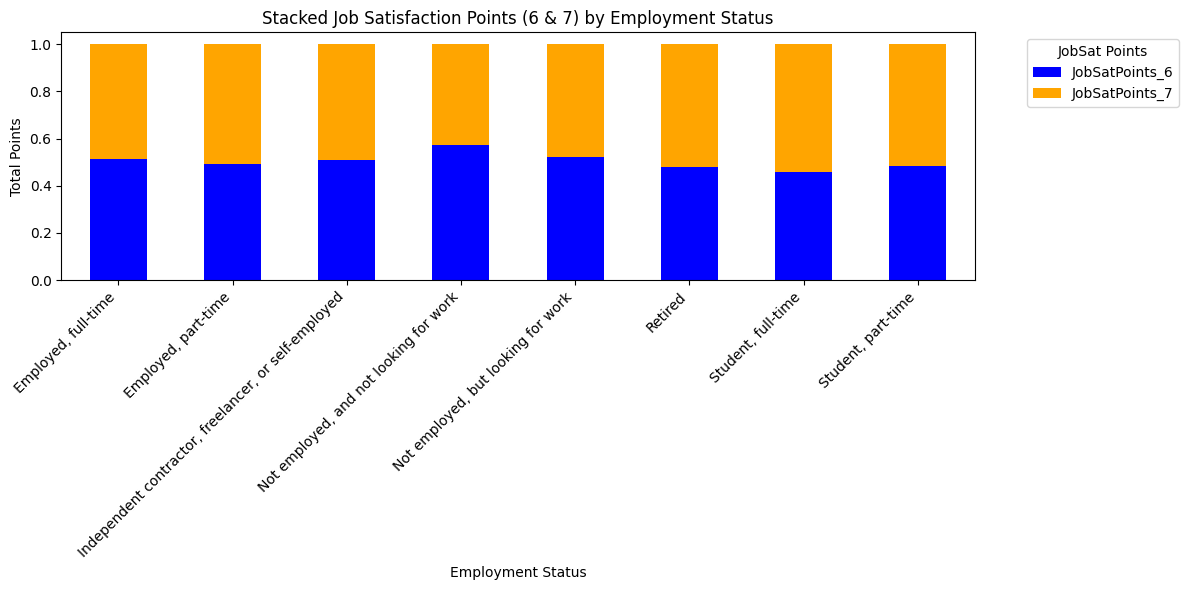

In [8]:
# Step 1: Split Employment by semicolon into multiple rows (explode)
df_exploded=df
df_exploded['Employment'] = df['Employment'].str.split(';')
df_exploded = df_exploded.explode('Employment')

# Step 2: Clean whitespace
df_exploded['Employment'] = df_exploded['Employment'].str.strip()
# Drop rows with NaN in either satisfaction column
df_exploded = df_exploded.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'])
# Step 3: Group by Employment and sum JobSatPoints_6 and JobSatPoints_7
agg_points = df_exploded.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()
# Step 4: Normalize each row to proportions
normalized_points = agg_points.div(agg_points.sum(axis=1), axis=0)
# Optional: Keep top 10 employment types by total points
#agg_points['Total'] = agg_points['JobSatPoints_6'] + agg_points['JobSatPoints_7']
#agg_points = agg_points.sort_values('Total', ascending=False).drop(columns='Total').head(10)

# Step 4: Plot stacked bar chart
ax = normalized_points.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue','orange'])

plt.title('Stacked Job Satisfaction Points (6 & 7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Total Points')
plt.legend(title='JobSat Points', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


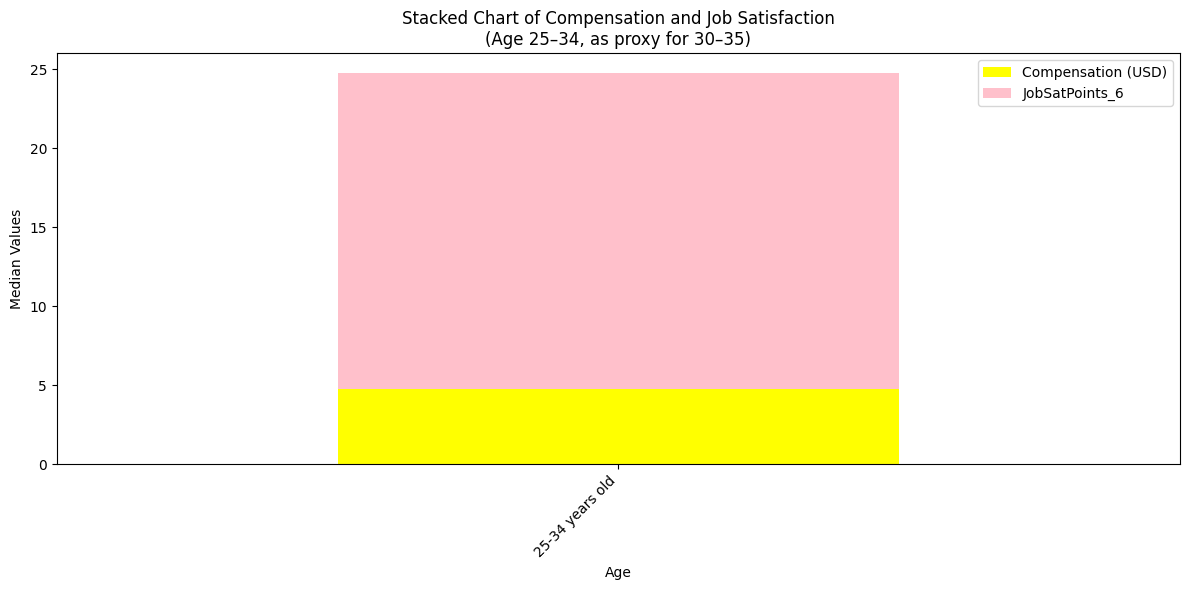

In [9]:
import numpy as np
# Filter age group 25–34 years old (approximation for 30–35)
df_filtered = df[df['Age'] == '25-34 years old']

# Drop rows with missing values
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Apply log10 to ConvertedCompYearly (add small constant to avoid log(0))
df_filtered['LogComp'] = np.log10(df_filtered['ConvertedCompYearly'] )

# Group by Employment (or other column, e.g., 'Country')
grouped = df_filtered.groupby('Age')[['LogComp', 'JobSatPoints_6']].median()

# Keep top 10 for visibility
#grouped = grouped.sort_values('ConvertedCompYearly', ascending=False).head(10)

# Plot
grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['yellow', 'pink']  # Compensation = blue, JobSat = orange
)

plt.title('Stacked Chart of Compensation and Job Satisfaction\n(Age 25–34, as proxy for 30–35)')
plt.xlabel('Age')
plt.ylabel('Median Values')
plt.legend(['Compensation (USD)', 'JobSatPoints_6'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']


<Figure size 1000x600 with 0 Axes>

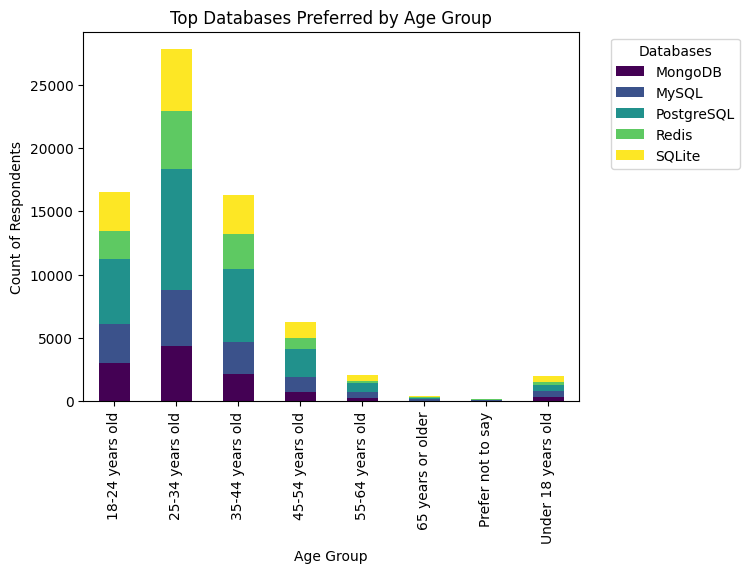

In [10]:
# List all columns containing 'database' or similar keywords (case-insensitive)
database_cols = [col for col in df.columns if 'database' in col.lower()]
print(database_cols)

# Copy data to avoid changing original
df_exp = df

# Drop rows with missing age or database data
df_exp = df_exp.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

# Split and explode database list
df_exp.loc[:,'DatabaseWantToWorkWith'] = df_exp['DatabaseWantToWorkWith'].str.split(';')
df_exp = df_exp.explode('DatabaseWantToWorkWith')

# Clean whitespace
df_exp['DatabaseWantToWorkWith'] = df_exp['DatabaseWantToWorkWith'].str.strip()

# Count total mentions per database (for filtering top databases)
top_dbs = df_exp['DatabaseWantToWorkWith'].value_counts().nlargest().index.tolist()
top_dbs

# Filter to top databases only
df_exp = df_exp[df_exp['DatabaseWantToWorkWith'].isin(top_dbs)]
df_exp

# Group by Age and Database, count
counts = df_exp.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')
counts

# Pivot the data for plotting
pivot_counts = counts.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_counts.plot(kind='bar', stacked=True, colormap="viridis")

plt.xlabel("Age Group")
plt.ylabel("Count of Respondents")
plt.title("Top Databases Preferred by Age Group")
plt.legend(title="Databases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 1000x600 with 0 Axes>

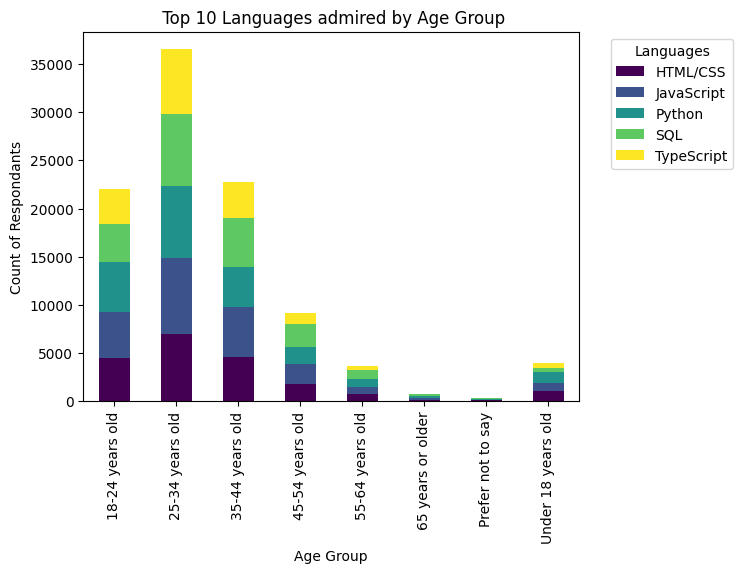

In [11]:
# Copy data to avoid changing original
df_exp = df

# Drop rows with missing age or database data
df_exp = df_exp.dropna(subset=['Age', 'LanguageAdmired'])

# Split and explode database list
df_exp.loc[:,'LanguageAdmired'] = df_exp['LanguageAdmired'].str.split(';')
df_exp = df_exp.explode('LanguageAdmired')

# Clean whitespace
df_exp['LanguageAdmired'] = df_exp['LanguageAdmired'].str.strip()

# Count total mentions per database (for filtering top databases)
top_dbs = df_exp['LanguageAdmired'].value_counts().nlargest().index.tolist()
top_dbs

# Filter to top databases only
df_exp = df_exp[df_exp['LanguageAdmired'].isin(top_dbs)]
df_exp

# Group by Age and Database, count
counts = df_exp.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')
counts
# Pivot the data for plotting
pivot_counts = counts.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_counts.plot(kind='bar', stacked=True, colormap="viridis")

plt.xlabel("Age Group")
plt.ylabel("Count of Respondants")
plt.title(" Top 10 Languages admired by Age Group")
plt.legend(title="Languages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [12]:
df['Employment']

0        [Employed, full-time]
1        [Employed, full-time]
2        [Employed, full-time]
3         [Student, full-time]
4         [Student, full-time]
                 ...          
65432    [Employed, full-time]
65433    [Employed, full-time]
65434    [Employed, full-time]
65435    [Employed, full-time]
65436     [Student, full-time]
Name: Employment, Length: 65437, dtype: object

In [13]:
df['PlatformAdmired']

0                                             NaN
1        Amazon Web Services (AWS);Heroku;Netlify
2                                    Google Cloud
3                       Amazon Web Services (AWS)
4                                             NaN
                           ...                   
65432                                         NaN
65433                                         NaN
65434                                         NaN
65435                                         NaN
65436      Cloudflare;Google Cloud;Netlify;Vercel
Name: PlatformAdmired, Length: 65437, dtype: object

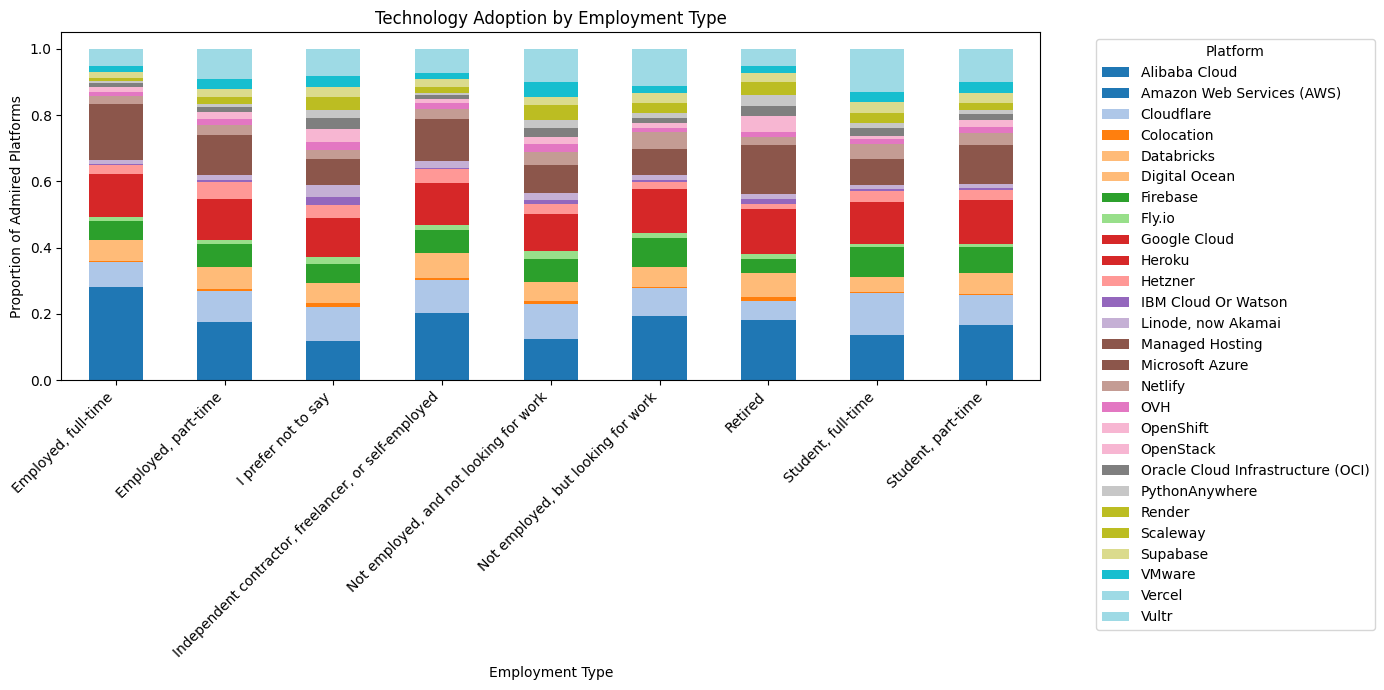

In [14]:

# Step 1: Drop missing values
df_filtered = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# Step 2: Split strings into lists
df_filtered['Employment'] = df_filtered['Employment'].apply(
    lambda x: x if isinstance(x, list) else str(x).split(';')
)
df_filtered['PlatformAdmired'] = df_filtered['PlatformAdmired'].apply(
    lambda x: x if isinstance(x, list) else str(x).split(';')
)

# Step 3: Explode both columns
df_exp = df_filtered.explode('Employment').explode('PlatformAdmired')

# Step 4: Clean whitespace
df_exp['Employment'] = df_exp['Employment'].str.strip()
df_exp['PlatformAdmired'] = df_exp['PlatformAdmired'].str.strip()

# Drop any blank entries
df_exp = df_exp[(df_exp['Employment'] != '') & (df_exp['PlatformAdmired'] != '')]

# Step 5: Group by Employment and PlatformAdmired
counts = df_exp.groupby(['Employment', 'PlatformAdmired']).size().reset_index(name='Count')

# Step 6: Pivot to wide format
pivot_df = counts.pivot(index='Employment', columns='PlatformAdmired', values='Count').fillna(0)

# Ensure numeric
pivot_df = pivot_df.apply(pd.to_numeric, errors='coerce').fillna(0)
# Step 7: Normalize for proportions (optional)
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 8: Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Technology Adoption by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Admired Platforms')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()